# Benchmark

Ce notebook compare différents modèles depuis un notebook.

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

Si le message *Widget Javascript not detected. It may not be installed or enabled properly.* apparaît, vous devriez exécuter la commande ``jupyter nbextension enable --py --sys-prefix widgetsnbextension`` depuis la ligne de commande. Le code suivant vous permet de vérifier que cela a été fait.

In [ ]:
from tqdm import tnrange, tqdm_notebook
from time import sleep

for i in tnrange(3, desc='1st loop'):
    for j in tqdm_notebook(range(20), desc='2nd loop'):
        sleep(0.01)

In [ ]:
%matplotlib inline

## Petit bench sur le clustering

### Définition du bench

In [ ]:
import dill
from tqdm import tnrange
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.datasets import make_blobs
from mlstatpy.ml import MlGridBenchMark

params = [dict(model=lambda : KMeans(n_clusters=3), name="KMeans-3", shortname="km-3"),
          dict(model=lambda : AgglomerativeClustering(), name="AgglomerativeClustering", shortname="aggclus")]

datasets = [dict(X=make_blobs(100, centers=3)[0], Nclus=3,
                 name="blob-100-3", shortname="b-100-3", no_split=True),
            dict(X=make_blobs(100, centers=5)[0], Nclus=5, 
                 name="blob-100-5", shortname="b-100-5", no_split=True) ]

bench = MlGridBenchMark("TestName", datasets, fLOG=None, clog=None,
                        cache_file="cache.pickle", pickle_module=dill, 
                        repetition=3, progressbar=tnrange,
                        graphx=["_time", "time_train", "Nclus"],
                        graphy=["silhouette", "Nrows"])

### Lancer le bench

In [ ]:
bench.run(params)

0/|/2017-03-19 20:11:11 [BenchMark.run] number of cached run: 4:   0%|| 0/4 [00:00<?, ?it/s]                           

3/|/2017-03-19 20:11:13 [BenchMark.run] done.:  75%|| 3/4 [00:02<00:00,  1.10it/s]                                     11it/s]_train': 0.02142968022685221, 'time_test': 0.0025012412126208527, '_btry': 'aggclus-b-100-5', '_iexp': 2, 'model_name': 'AgglomerativeClustering', 'ds_name': 'blob-100-5', 'Nrows': 100, 'Nfeat': 2, 'Nclus': 5, 'no_split': True, '_date': datetime.datetime(2017, 3, 19, 20, 11, 11, 647355), '_time': 0.1007650830318858, '_span': datetime.timedelta(0, 0, 112581), '_i': 3, '_name': 'TestName'}:  75%|| 3/4 [00:00<00:00,  4.22it/s]]0:00,  3.53it/s]]


### Récupérer les résultats

In [ ]:
df = bench.to_df()
df

,_btry,_date,_i,_iexp,_name,_span,_time,Nclus,Nfeat,Nrows,ds_name,model_name,no_split,own_score,silhouette,time_preproc,time_test,time_train
0,km-3-b-100-3,2017-03-19 20:11:11.132135,0,0,TestName,0:00:00.147610,0.147594,3,2,100,blob-100-3,KMeans-3,True,-175.396944,0.700618,0.009154,0.003195,0.044693
1,km-3-b-100-3,0:00:00.147610,0,1,TestName,2017-03-19 20:11:11.140141,0.147594,3,2,100,blob-100-3,KMeans-3,True,-175.396944,0.700618,0.006068,0.002803,0.037633
2,km-3-b-100-3,2017-03-19 20:11:11.140141,0,2,TestName,0:00:00.155620,0.147594,3,2,100,blob-100-3,KMeans-3,True,-175.396944,0.700618,0.006230,0.002630,0.035106
3,aggclus-b-100-3,2017-03-19 20:11:11.317283,1,0,TestName,0:00:00.096081,0.096700,3,2,100,blob-100-3,AgglomerativeClustering,True,NaN,0.662345,0.008147,0.002508,0.026997
4,aggclus-b-100-3,0:00:00.096081,1,1,TestName,2017-03-19 20:11:11.325288,0.096700,3,2,100,blob-100-3,AgglomerativeClustering,True,NaN,0.662345,0.009511,0.004156,0.016807
5,aggclus-b-100-3,2017-03-19 20:11:11.325288,1,2,TestName,0:00:00.106088,0.096700,3,2,100,blob-100-3,AgglomerativeClustering,True,NaN,0.662345,0.007018,0.003252,0.018227
6,km-3-b-100-5,2017-03-19 20:11:11.452688,2,0,TestName,0:00:00.145130,0.145012,5,2,100,blob-100-5,KMeans-3,True,-466.829200,0.790511,0.007587,0.002748,0.033610
7,km-3-b-100-5,0:00:00.145130,2,1,TestName,2017-03-19 20:11:11.463199,0.145012,5,2,100,blob-100-5,KMeans-3,True,-466.829200,0.790511,0.007471,0.002278,0.036098
8,km-3-b-100-5,2017-03-19 20:11:11.463199,2,2,TestName,0:00:00.153136,0.145012,5,2,100,blob-100-5,KMeans-3,True,-466.829200,0.790511,0.011576,0.004463,0.039103
9,aggclus-b-100-5,2017-03-19 20:11:11.640351,3,0,TestName,0:00:00.101573,0.100765,5,2,100,blob-100-5,AgglomerativeClustering,True,NaN,0.636241,0.009483,0.002418,0.020562


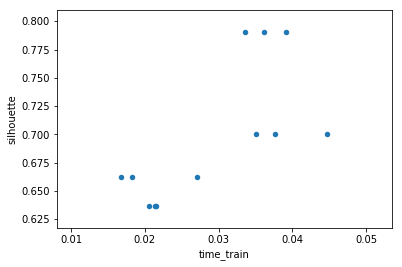

In [ ]:
df.plot(x="time_train", y="silhouette", kind="scatter")

### Dessin, Graphs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000122B8269A90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000122B8462588>]], dtype=object)

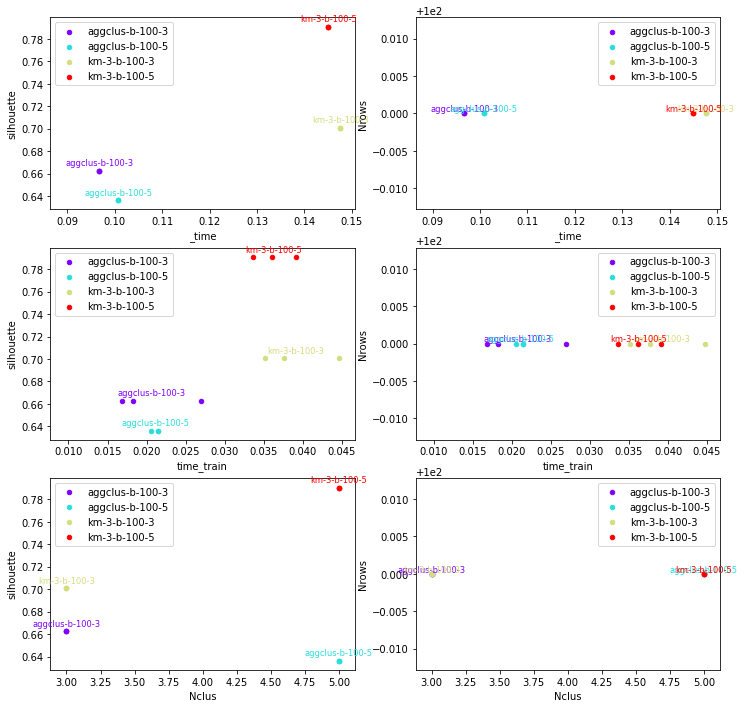

In [ ]:
bench.plot_graphs(figsize=(12,12))